In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# cd documents/nss/projects/Python_Projects/music_matters/Notebooks

Things to look into:
 - top venues
 - top cover song by venue
 - percentage of cover to total per city (pie chart)
 - percentage of cover to total per venue 
 - top 10 covered songs overall
 - top 10 covered artists overall

In [2]:
data={'Cities':['New York', 'Nashville', 'Austin', 'Los Angeles', 'Chicago', 
           'Las Vegas', 'Denver', 'San Fransicso', 'Seattle', 'Portland'], 
 'States': ['NY', 'TN', 'TX', 'CA', 'IL', 'NV', 'CO', 'CA', 'WA', 'OR'], 
      'Number of Setlists':[8155, 2225, 4369, 8021, 5683, 4327, 3063, 2565, 3186, 2362]}


df=pd.DataFrame(data)

df['Number of Requests']=df['Number of Setlists']/20
df

,Cities,States,Number of Setlists,Number of Requests
0,New York,NY,8155,407.75
1,Nashville,TN,2225,111.25
2,Austin,TX,4369,218.45
3,Los Angeles,CA,8021,401.05
4,Chicago,IL,5683,284.15
5,Las Vegas,NV,4327,216.35
6,Denver,CO,3063,153.15
7,San Fransicso,CA,2565,128.25
8,Seattle,WA,3186,159.30
9,Portland,OR,2362,118.10


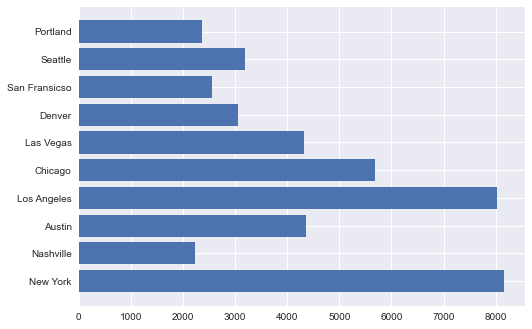

In [3]:
# US cities
plt.barh(df['Cities'],df['Number of Setlists'])
plt.show()

In [4]:
non_us_cities = {'Cities': ['London', 'Paris', 'Toronto', 'Buenos Aires', 'Manchester', 'Brussels', 'Berlin', 'Barcelona', 'Amsterdam', 'Antwerp','Glasgow'], 
        'Country_Code': ['GB', 'FR', 'CA', 'AR', 'GB', 'BE', 'DE','ES', 'NL', 'BE', 'GB'], 
        'Number of Setlists':[8409,3791,3788,3480,3059,2634,2504,2417,2235,2215,2018]      
       }

non_us_cities_df=pd.DataFrame(non_us_cities)

non_us_cities_df['Number of Requests']=non_us_cities_df['Number of Setlists']/20
non_us_cities_df

,Cities,Country_Code,Number of Setlists,Number of Requests
0,London,GB,8409,420.45
1,Paris,FR,3791,189.55
2,Toronto,CA,3788,189.40
3,Buenos Aires,AR,3480,174.00
4,Manchester,GB,3059,152.95
5,Brussels,BE,2634,131.70
6,Berlin,DE,2504,125.20
7,Barcelona,ES,2417,120.85
8,Amsterdam,NL,2235,111.75
9,Antwerp,BE,2215,110.75


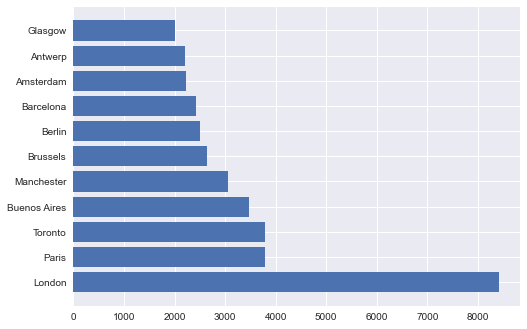

In [5]:
plt.barh(non_us_cities_df['Cities'],non_us_cities_df['Number of Setlists'])
plt.show()

In [6]:
portland=pd.read_excel('../Data/music_matters_portland.xlsx')
portland['city'].value_counts()

Portland        11641
Troutdale         665
Happy Valley      296
Forest Grove      131
Beaverton          37
West Linn          16
Name: city, dtype: int64

Realized that by Portland, they also included concerts from the surrounding area. Decided to only focus on concerts in the proper city area. 

In [7]:
portland = portland[portland['city']=='Portland']
portland['city'].value_counts()

Portland    11641
Name: city, dtype: int64

In [8]:
seattle=pd.read_excel('../Data/music_matters_seattle.xlsx')
seattle = seattle[seattle['city']=='Seattle']

In [9]:
nashville=pd.read_excel('../Data/music_matters_nashville.xlsx')
nashville = nashville[nashville['city']=='Nashville']

In [10]:
new_york=pd.read_excel('../Data/music_matters_new_york.xlsx')
new_york = new_york[new_york['city']=='New York']

In [11]:
los_angeles =pd.read_excel('../Data/music_matters_los_angeles.xlsx')
los_angeles = los_angeles[los_angeles['city']=='Los Angeles']

In [12]:
austin =pd.read_excel('../Data/music_matters_austin.xlsx')
austin = austin[austin['city']=='Austin']

In [13]:
chicago =pd.read_excel('../Data/music_matters_chicago.xlsx')
chicago = chicago[chicago['city']=='Chicago']

In [14]:
denver =pd.read_excel('../Data/music_matters_denver.xlsx')
denver = denver[denver['city']=='Denver']

In [15]:
las_vegas =pd.read_excel('../Data/music_matters_las_vegas.xlsx')
las_vegas = las_vegas[las_vegas['city']=='Las Vegas']

In [16]:
san_francisco =pd.read_excel('../Data/music_matters_san_francisco.xlsx')
san_francisco = san_francisco[san_francisco['city']=='San Francisco']

## Non US Cities

In [17]:
paris =pd.read_excel('../Data/music_matters_paris.xlsx')
paris = paris[paris['city']=='Paris']

In [18]:
toronto =pd.read_excel('../Data/music_matters_toronto.xlsx')
toronto = toronto[toronto['city']=='Toronto']

In [19]:
manchester =pd.read_excel('../Data/music_matters_manchester.xlsx')
manchester = manchester[manchester['city']=='Manchester']

In [20]:
london =pd.read_excel('../Data/music_matters_london.xlsx')
london = london[london['city']=='London']

In [21]:
buenos_aires =pd.read_excel('../Data/music_matters_buenos_aires.xlsx')
buenos_aires = buenos_aires[buenos_aires['city']=='Buenos Aires']

In [22]:
berlin =pd.read_excel('../Data/music_matters_berlin.xlsx')
berlin = berlin[berlin['city']=='Berlin']

In [23]:
brussels =pd.read_excel('../Data/music_matters_brussels.xlsx')
brussels = brussels[brussels['city']=='Brussels']

In [24]:
barcelona =pd.read_excel('../Data/music_matters_barcelona.xlsx')
barcelona= barcelona[barcelona['city']=='Barcelona']

In [26]:
amsterdam =pd.read_excel('../Data/music_matters_amsterdam.xlsx')
amsterdam = amsterdam[amsterdam['city']=='Amsterdam']

In [25]:
antwerp =pd.read_excel('../Data/music_matters_antwerp.xlsx')
antwerp = antwerp[antwerp['city']=='Antwerp']

In [27]:
# need to add bueno_aires, berlin, amsterdam, and antwerp

concat = pd.concat([new_york, nashville, seattle, portland, los_angeles, chicago, austin, denver, las_vegas, san_francisco, paris, toronto, manchester, london, brussels, berlin, barcelona, buenos_aires, amsterdam, antwerp], ignore_index=True)

In [46]:
concat['original_vs_cover'] = np.where(concat['cover']=='original', 'Original', 'Cover')


In [45]:
covers = concat[concat['original_vs_cover']=='Cover']

In [32]:
us=concat[concat['country']=='United States']

In [33]:
non_us = concat[concat['country']!='United States']

In [38]:
us_covers = us[us['original_vs_cover']=='Cover']

In [39]:
non_us_covers = non_us[non_us['original_vs_cover']=='Cover']


<AxesSubplot:>

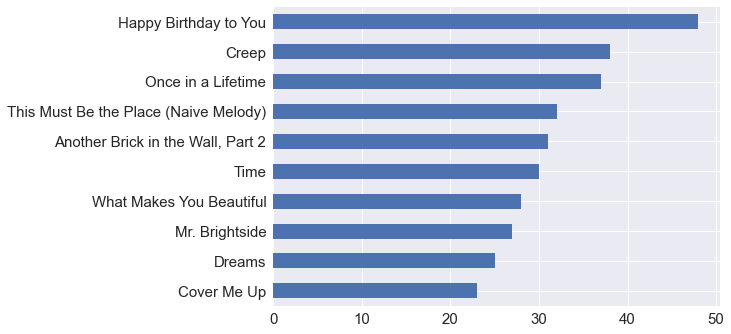

In [40]:
us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


<AxesSubplot:>

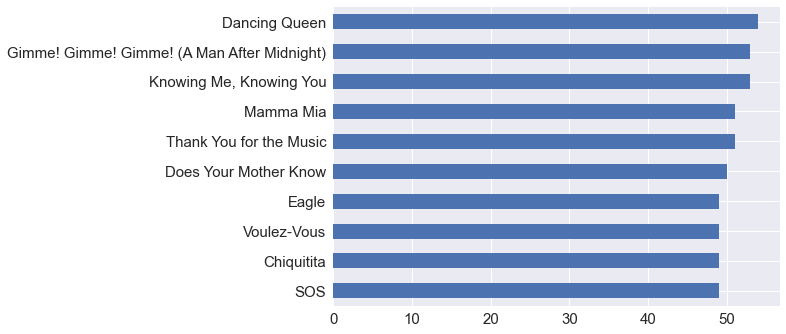

In [44]:
non_us_covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


<AxesSubplot:>

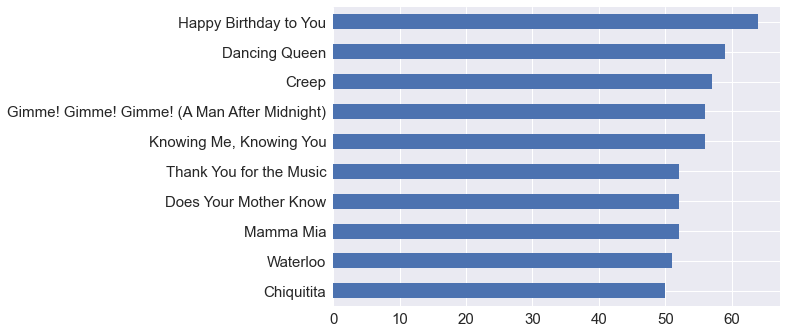

In [43]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


<AxesSubplot:>

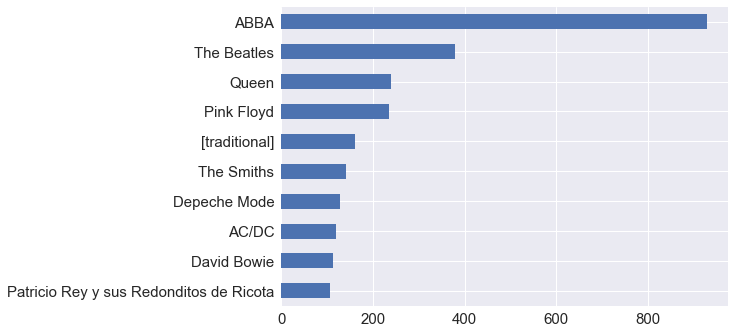

In [64]:
non_us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


<AxesSubplot:>

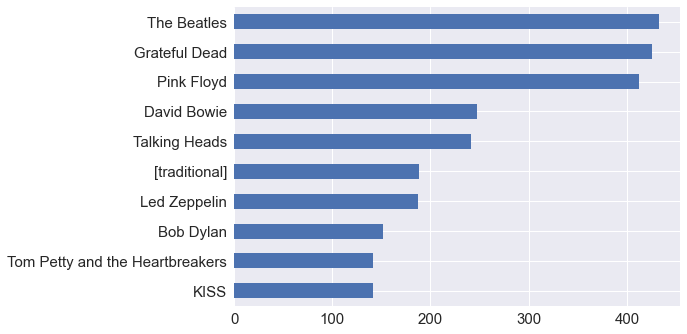

In [63]:
us_covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


<AxesSubplot:>

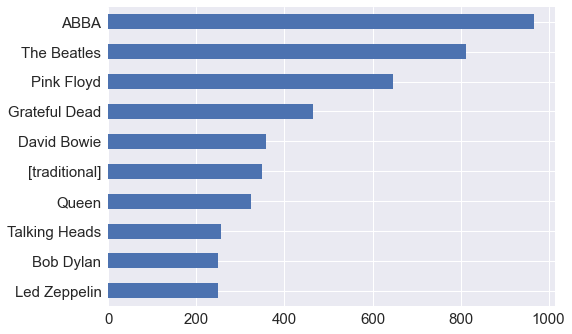

In [62]:
covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)


In [ ]:
concat['state'].value_counts()

In [ ]:
concat['city'].value_counts()

In [ ]:
concat['city'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='barh')

Text(0.5, 1.0, 'Covers VS Originals')

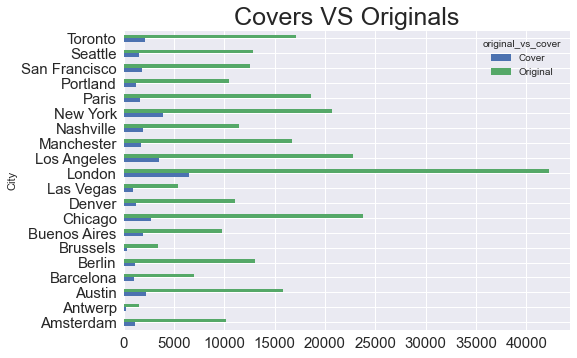

In [51]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)
# plt.tight_layout()



In [47]:
top_10_cities = concat.groupby('city').count()
top_10_cities

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
city,,,,,,,,,,,,,,,,
Amsterdam,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11305,11250,11305,11305
Antwerp,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1634,1649,1649
Austin,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,17822,18029,18029
Barcelona,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7958,7926,7958,7958
Berlin,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14191,14076,14191,14191
Brussels,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3739,3732,3739,3739
Buenos Aires,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11660,11564,11660,11660
Chicago,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26527,26348,26527,26527
Denver,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12219,12141,12219,12219


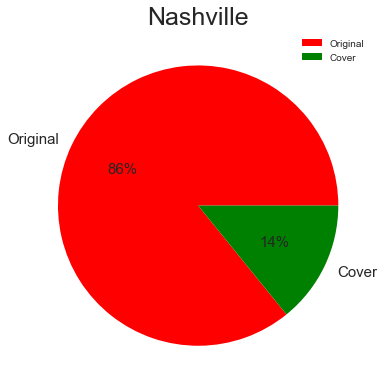

In [101]:
nashville = concat[concat['city']=='Nashville']

nashville['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Nashville',fontsize=25)
plt.tight_layout()

In [ ]:
nashville['artist'].value_counts()

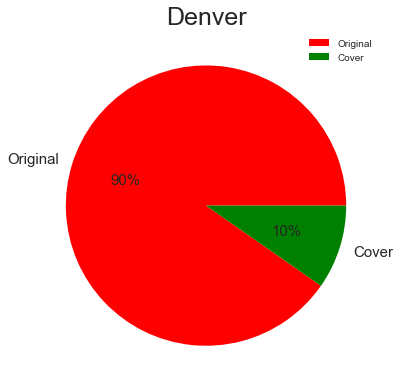

In [118]:
denver = concat[concat['city']=='Denver']

denver['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Denver',fontsize=25)
plt.tight_layout()

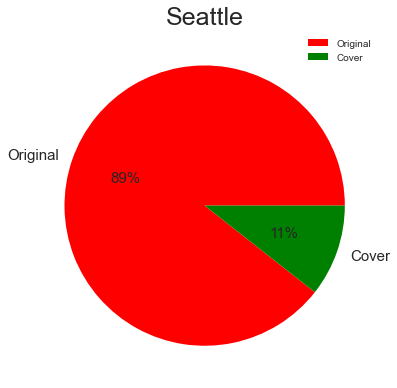

In [119]:
seattle = concat[concat['city']=='Seattle']

seattle['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Seattle',fontsize=25)
plt.tight_layout()

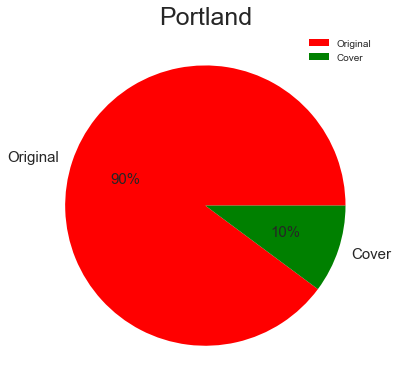

In [120]:
portland = concat[concat['city']=='Portland']

portland['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Portland',fontsize=25)
plt.tight_layout()

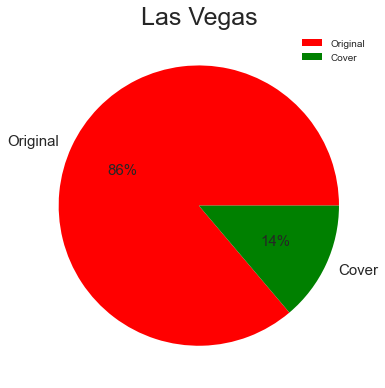

In [121]:
las_vegas = concat[concat['city']=='Las Vegas']

las_vegas['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Las Vegas',fontsize=25)
plt.tight_layout()

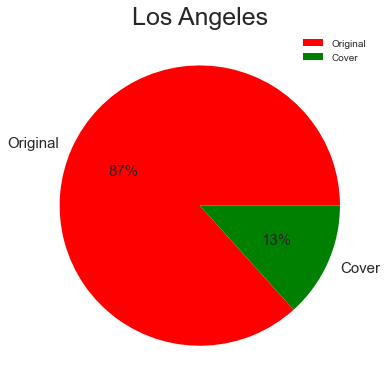

In [122]:
los_angeles = concat[concat['city']=='Los Angeles']

los_angeles['original_vs_cover'].value_counts(normalize=True).plot(kind='pie',autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Los Angeles',fontsize=25)
plt.tight_layout()

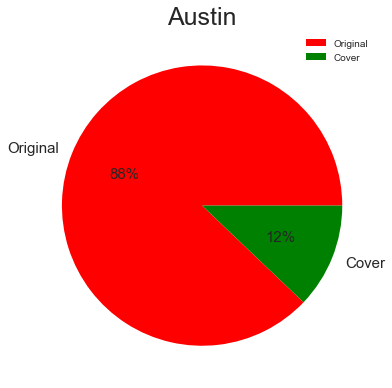

In [123]:
austin = concat[concat['city']=='Austin']

austin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Austin',fontsize=25)
plt.tight_layout()

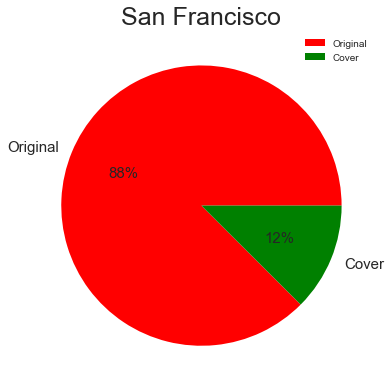

In [124]:
san_francisco = concat[concat['city']=='San Francisco']

san_francisco['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('San Francisco',fontsize=25)
plt.tight_layout()

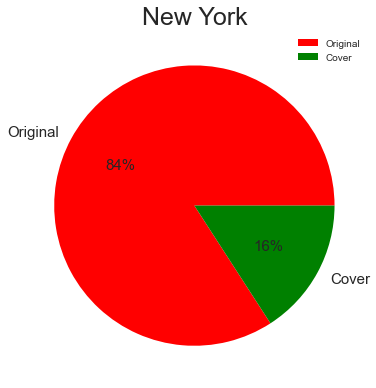

In [125]:
new_york = concat[concat['city']=='New York']

new_york['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('New York',fontsize=25)
plt.tight_layout()



## PIE CHARTS FOR NON US CITIES

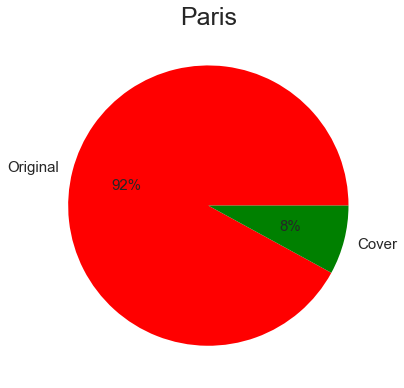

In [108]:
paris = concat[concat['city']=='Paris']
paris['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Paris',fontsize=25)
plt.tight_layout()

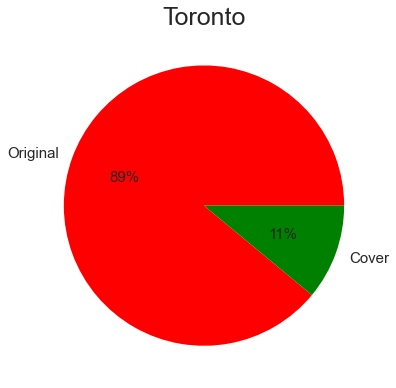

In [109]:
toronto = concat[concat['city']=='Toronto']
toronto['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Toronto',fontsize=25)
plt.tight_layout()

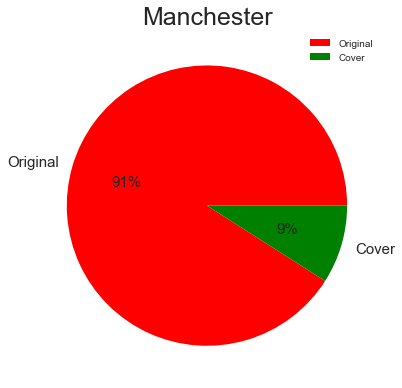

In [110]:
manchester = concat[concat['city']=='Manchester']
manchester['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Manchester',fontsize=25)
plt.tight_layout()

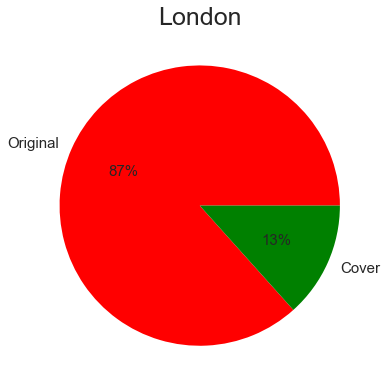

In [111]:
london = concat[concat['city']=='London']
london['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('London',fontsize=25)
plt.tight_layout()

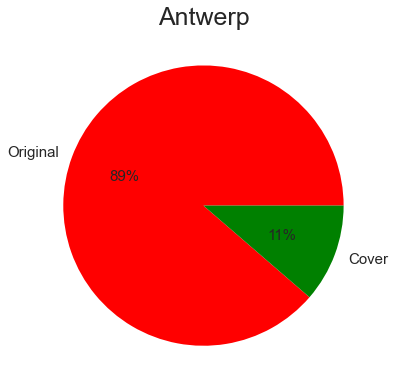

In [112]:
antwerp = concat[concat['city']=='Antwerp']
antwerp['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Antwerp',fontsize=25)
plt.tight_layout()

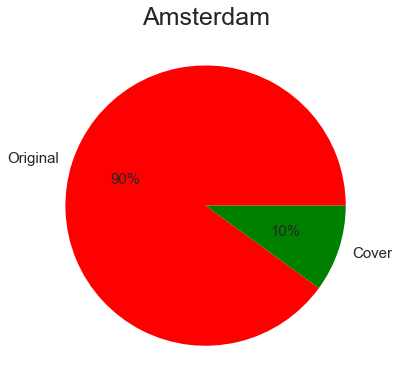

In [117]:
amsterdam = concat[concat['city']=='Amsterdam']
amsterdam['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Amsterdam',fontsize=25)
plt.tight_layout()

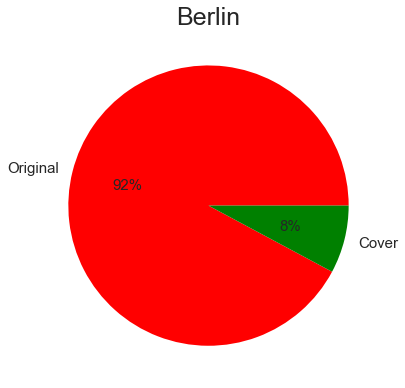

In [113]:
berlin = concat[concat['city']=='Berlin']
berlin['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Berlin',fontsize=25)
plt.tight_layout()

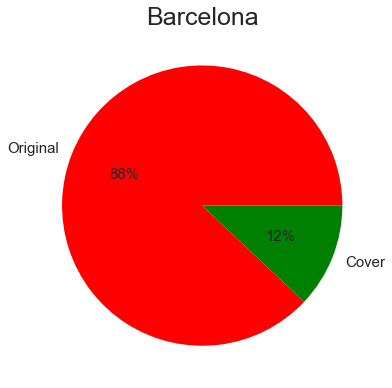

In [114]:
barcelona = concat[concat['city']=='Barcelona']
barcelona['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Barcelona',fontsize=25)
plt.tight_layout()

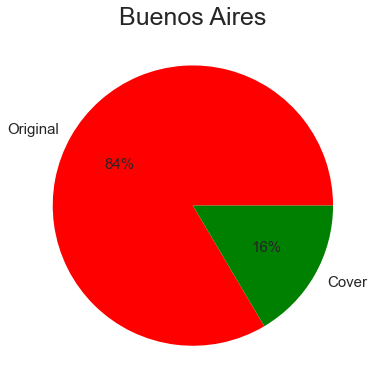

In [116]:
buenos_aires = concat[concat['city']=='Buenos Aires']
buenos_aires['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Buenos Aires',fontsize=25)
plt.tight_layout()

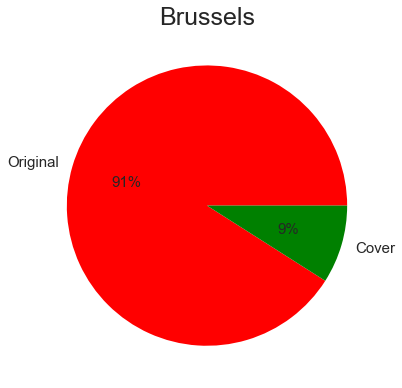

In [115]:
brussels = concat[concat['city']=='Brussels']
brussels['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', ylabel='',colors=['red','green'], fontsize=15)

plt.title('Brussels',fontsize=25)
plt.tight_layout()

In [ ]:
chart =covers['cover'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Artists',fontsize=25)
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.bar_label(chart.containers, size=11, label_type='center')
# plt.savefig("Eligibility_Categories.png")
# plt.show()

In [ ]:
covers['song'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind='barh', xlabel='', legend=False, ylabel='', fontsize=15)

# plt.title('Top 10 Covered Songs',fontsize=25)

In [ ]:
concat.groupby(['original_vs_cover', 'artist'])['song'].count()


In [ ]:
# want to look at what venues have the highest proportion of covers to originals (group by cvo and venue)
# want to look at which artists play the most cover songs (group by cvo and artist)

In [ ]:
concat['artist'].value_counts().nlargest(10).plot(kind='barh')

In [ ]:
harry_styles=concat[concat['artist']=='Harry Styles']
distribution = harry_styles.groupby('original_vs_cover').count()
distribution

In [ ]:

harry_styles_originals = harry_styles[harry_styles['original_vs_cover']=='Original']
# percentage =harry_styles_covers/harry_styles_originals
# percentage

In [ ]:
concat.groupby('original_vs_cover')['state'].value_counts(normalize=True).mul(100)

In [ ]:
nashville.groupby('original_vs_cover')['venue'].value_counts(normalize=True).mul(100)

In [ ]:
concat.groupby('state')['original_vs_cover'].value_counts(normalize=True).mul(100).round()

In [ ]:
concat.groupby('city')['original_vs_cover'].value_counts(normalize=True).mul(100).round().sort_values(ascending=False).plot(kind='barh')



In [ ]:
concat.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='City', legend=True, ylabel='', fontsize=15)


In [48]:
concat_1 = concat[['ids', 'country','original_vs_cover']]

In [49]:
concat_2 =concat_1.groupby(['country', 'original_vs_cover']).count()

In [50]:
concat_3 =concat_2.reset_index()
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


Text(0.5, 1.0, 'Covers VS Originals')

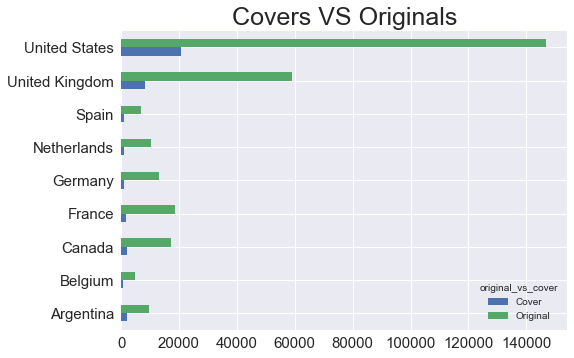

In [54]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals',fontsize=25)

In [ ]:
plt.barh(concat_3['country'], concat_3['ids'])
plt.show()



Text(0.5, 1.0, 'Covers VS Originals by US Cities')

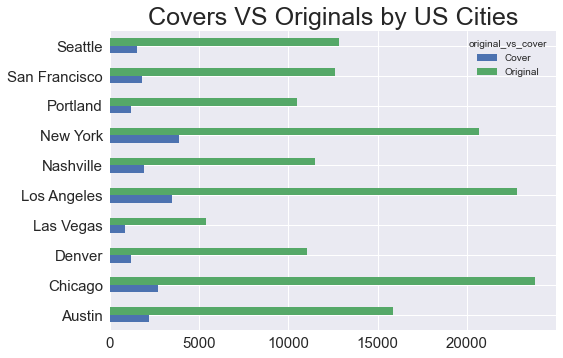

In [70]:
us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by US Cities',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Country')

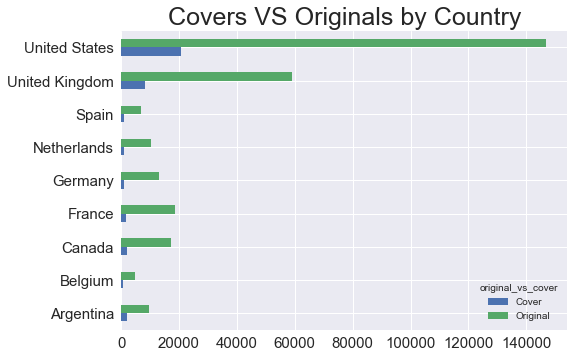

In [69]:
concat.groupby(['country', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Country',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Non US Cities')

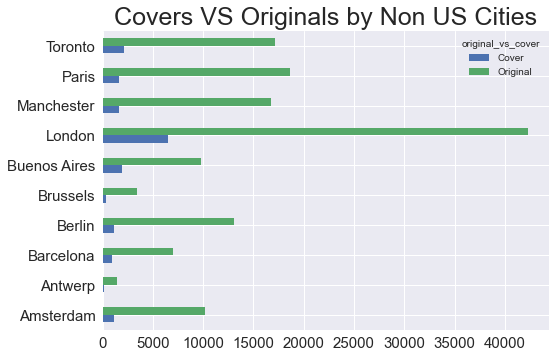

In [67]:
non_us.groupby(['city', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Non US Cities',fontsize=25)

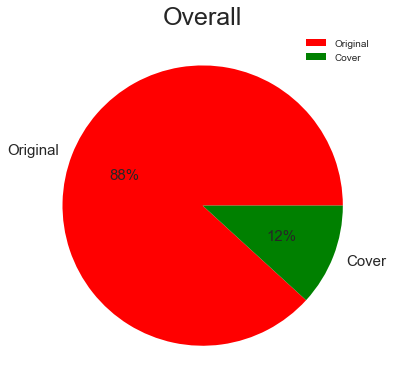

In [71]:
concat['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Overall',fontsize=25)
plt.tight_layout()
                        

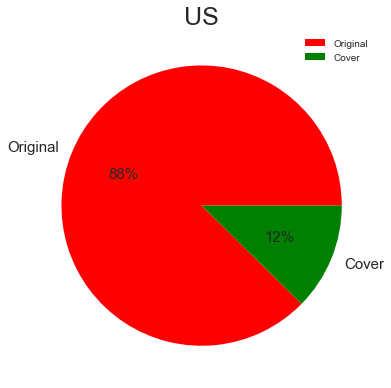

In [75]:
us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('US',fontsize=25)
plt.tight_layout()
                        

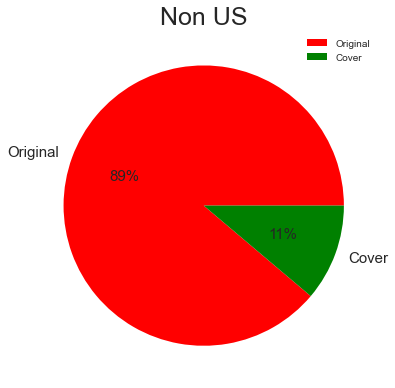

In [74]:
non_us['original_vs_cover'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', legend=True, ylabel='',colors=['red','green'], fontsize=15)

plt.title('Non US',fontsize=25)
plt.tight_layout()
                        

In [87]:
concat['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)


,original_vs_cover
Original,88.0
Cover,12.0


In [104]:
us_df = us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [103]:
non_us_df= non_us['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

In [102]:
nashville['original_vs_cover'].value_counts(normalize=True).mul(100).to_frame().round(0)

,original_vs_cover
Original,86.0
Cover,14.0


In [106]:
both = pd.concat([us_df, non_us_df])
both

,original_vs_cover
Original,88.0
Cover,12.0
Original,89.0
Cover,11.0


In [95]:
concat_3

,country,original_vs_cover,ids
0,Argentina,Cover,1923
1,Argentina,Original,9737
2,Belgium,Cover,524
3,Belgium,Original,4864
4,Canada,Cover,2122
5,Canada,Original,17137
6,France,Cover,1612
7,France,Original,18643
8,Germany,Cover,1110
9,Germany,Original,13081


In [97]:
# concat_3.groupby(['country', 'original_vs_cover']).value_counts(normalize=True).to_frame()


In [127]:
# artists who played the most songs. Also want to look at who played the most shows? group by ids?
concat['artist'].value_counts()

ABBA Voyage               948
Bob Schneider             947
Alien Chicks              632
Harry Styles              620
Kendrick Lamar            618
                         ... 
Omar                        1
Silvina Moreno              1
Yellow Socks Orchestra      1
Molly Pepper                1
Yves Paquet                 1
Name: artist, Length: 10059, dtype: int64

In [129]:
concat['venue'].value_counts()

O2 Academy Brixton                               2797
Ryman Auditorium                                 2791
Private Venue                                    2635
Paradiso Grote Zaal                              2280
The O2 Arena                                     2233
                                                 ... 
Salmon Bay Eagles (Fraternal Order of Eagles)       1
Teatro de la Psychomachia                           1
Phonox                                              1
Fraternal Order of Eagles                           1
Théâtre du Châtelet                                 1
Name: venue, Length: 2335, dtype: int64

In [131]:
concat.groupby('artist')['ids'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: ids, dtype: int64

In [140]:
concat.groupby(['artist', 'ids']).count().nlargest(10)

TypeError: nlargest() missing 1 required positional argument: 'columns'

In [143]:
concat_id = concat.reset_index()
concat_id.head()

,index,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original


In [144]:

concat_id.groupby(['artist', 'ids'])['index'].count().nlargest(10)

artist            ids     
CLUB 90's         7bb22a58    80
Guided by Voices  53898f31    46
                  23beb8d3    45
Stephen Horne     23b10807    44
Duki              1bb1cdf8    43
Guided by Voices  5b894b7c    43
                  23b6a813    42
                  7b8952c4    42
Lou Barlow        1bbee58c    42
Guided by Voices  4b8957ba    41
Name: index, dtype: int64

In [149]:
# look at song name popularity (that is not a cover)

originals = concat[concat['original_vs_cover']=='Original']

originals['song'].value_counts().nlargest(25)

Intro          310
Drum Solo      147
Home           142
Paradise       112
Satellite       89
Gravity         88
Forever         82
Sorry           81
Promises        76
Free            76
Wake Up         75
Happy           74
Matilda         74
Guitar Solo     73
Fire            73
Heaven          70
Change          70
Psycho          70
Strangers       70
Teeth           70
Lonely          69
Run             69
Gasoline        69
Control         68
Hurricane       68
Name: song, dtype: int64

In [151]:
originals.groupby('artist')['song'].count().nlargest(25)

artist
Bob Schneider             884
Alien Chicks              632
Harry Styles              567
Kendrick Lamar            563
Mitski                    544
Pavement                  524
Turnstile                 477
Wet Leg                   449
Alicia Keys               427
Circle Jerks              407
Wallows                   405
IDLES                     404
Fontaines D.C.            378
Hanson                    372
Bob Dylan                 366
Pinegrove                 358
Mudhoney                  357
Wolf Alice                357
Die Ärzte                 345
Machine Gun Kelly         344
PUP                       344
Post Malone               342
5 Seconds of Summer       338
Florence + the Machine    338
Osees                     336
Name: song, dtype: int64

In [153]:
# artist with the most shows overall (arist by ids)

concat.groupby('artist')['ids'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: ids, dtype: int64

In [164]:
concat['ids'].value_counts()

7bb22a58    80
53898f31    46
23beb8d3    45
23b10807    44
5b894b7c    43
            ..
4bb343a2     1
63bf92bf     1
4bbf9b4e     1
bbe5de6      1
1b887580     1
Name: ids, Length: 29035, dtype: int64

In [167]:
# second longest set:

second_longest_set = concat[concat['ids']=='53898f31']
second_longest_set.head()

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
22165,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Everybody Thinks I'm a Raincloud (When I'm Not...,original,Original
22166,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Re-Develop,original,Original
22167,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Spanish Coin,original,Original
22168,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,A Salty Salute,original,Original
22169,53898f31,g63cceab7,04-03-2022,2022-03-29T00:53:50.814+0000,Guided by Voices,Irving Plaza,4bd61f3e,New York,New York,United States,NY,US,40.714269,-74.005973,Haircut Sphinx,original,Original


In [169]:
second_longest_set['song'].value_counts()

# no repeated songs

Everybody Thinks I'm a Raincloud (When I'm Not Looking)    1
Mad River Man                                              1
The Batman Sees the Ball                                   1
Stops                                                      1
To Keep an Area                                            1
Never Abandon Ship                                         1
The Very Second                                            1
Yours to Keep                                              1
Echos Myron                                                1
Free Agents                                                1
The Rally Boys                                             1
My Kind of Soldier                                         1
Re-Develop                                                 1
The Best of Jill Hives                                     1
People Need Holes                                          1
Twilight Campfighter                                       1
Crystal Nuns Cathedral  

In [170]:
# Guided by Voices played 46 songs and 2 of them were covers

second_longest_set['original_vs_cover'].value_counts()

Original    44
Cover        2
Name: original_vs_cover, dtype: int64

In [ ]:
# want to look at most popular song names but grouped by show (ids) or artist

<AxesSubplot:>

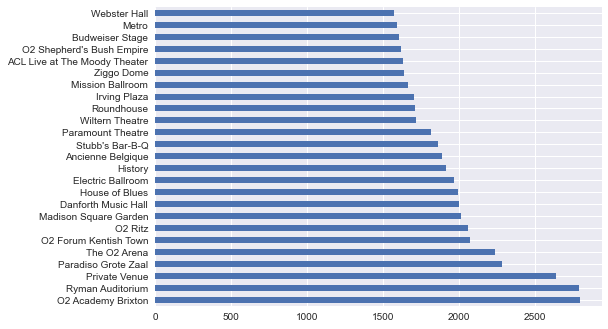

In [177]:
# venues with the most songs played 
concat['venue'].value_counts().nlargest(25).plot(kind='barh')

In [183]:
# shows the amount of songs per show

shows = concat.groupby('ids').count()
shows.head()

,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
ids,,,,,,,,,,,,,,,,
3897507,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
7389960,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
13881559,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
13881579,7,7,7,7,7,7,7,7,7,7,7,7,7,6,7,7
13883975,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


AttributeError: 'DataFrame' object has no attribute 'avg'

In [ ]:
# look at which venues have the most cover songs played their venues
# group by ids (show). Then calculate proportion of original to cover. Create seperate column to classify set as more original or more covers. create this measurre based on average amount of covers per set. 
# Find average cover songs/set. 

In [173]:
artists_by_show =concat.groupby(['artist','ids']).count()
artists_by_show

versionid  eventdate  \
artist                                     ids                              
!!!                                        13b48145          4          4   
                                           33b16c11         12         12   
                                           43b72f47         11         11   
                                           53b203f5          6          6   
!Bang Elektronika                          73b2fa75          7          7   
...                                                        ...        ...   
…And You Will Know Us by the Trail of Dead 3b3810f          12         12   
                                           43892f23          8          8   
                                           43b1173b         16         16   
                                           4bb19fea         11         11   
                                           5bb19fe8         14         14   

                                                     lastupdated  venue  \
artist                                     ids                            
!!!                                        13b48145            4      4   
                                           33b16c11           12     12   
                                           43b72f47           11     11   
                                           53b203f5            6      6   
!Bang Elektronika                          73b2fa75            7      7   
...                                                          ...    ...   
…And You Will Know Us by the Trail of Dead 3b3810f            12     12   
                                           43892f23            8      8   
                                           43b1173b           16     16   
                                           4bb19fea           11     11   
                                           5bb19fe8           14     14   

                                                     venue_id  city  state  \
artist                                     ids                               
!!!                                        13b48145         4     4      4   
                                           33b16c11        12    12     12   
                                           43b72f47        11    11     11   
                                           53b203f5         6     6      6   
!Bang Elektronika                          73b2fa75         7     7      7   
...                                                       ...   ...    ...   
…And You Will Know Us by the Trail of Dead 3b3810f         12    12     12   
                                           43892f23         8     8      8   
                                           43b1173b        16    16     16   
                                           4bb19fea        11    11     11   
                                           5bb19fe8        14    14     14   

                                                     country  stateCode  \
artist                                     ids                            
!!!                                        13b48145        4          4   
                                           33b16c11       12         12   
                                           43b72f47       11         11   
                                           53b203f5        6          6   
!Bang Elektronika                          73b2fa75        7          7   
...                                                      ...        ...   
…And You Will Know Us by the Trail of Dead 3b3810f        12         12   
                                           43892f23        8          8   
                                           43b1173b       16         16   
                                           4bb19fea       11         11   
                                           5bb19fe8       14         14   

                                                     countryCode  lat_coords  \
arti

8     1902
7     1887
1     1761
10    1756
12    1722
11    1678
15    1665
14    1657
9     1608
13    1601
16    1404
6     1337
17    1234
18    1019
2      996
5      985
3      830
4      828
19     737
20     620
21     483
22     308
23     256
24     165
25     118
26      72
27      68
28      66
30      53
29      38
31      36
0       36
32      26
33      21
34      17
35      14
36       9
37       5
42       4
41       2
40       2
39       2
38       2
80       1
45       1
46       1
43       1
44       1
Name: song, dtype: int64

In [155]:

concat_id.groupby('artist')['index'].count().nlargest(10)

artist
ABBA Voyage        948
Bob Schneider      947
Alien Chicks       632
Harry Styles       620
Kendrick Lamar     618
Robyn Hitchcock    606
Mitski             547
Pavement           526
Alicia Keys        493
Turnstile          488
Name: index, dtype: int64

In [132]:
concat.head(10)

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
0,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Did I Make You Up?,original,Original
1,63bc928f,g43e24baf,12-12-2022,2022-12-13T19:34:01.209+0000,half•alive,VEVO Studios,7bd49210,New York,New York,United States,NY,US,40.714269,-74.005973,Brighton,original,Original
2,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Death by Rock and Roll,original,Original
3,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Since You're Gone,original,Original
4,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Only Love Can Save Me Now,original,Original
5,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Loud Love,Soundgarden,Cover
6,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Make Me Wanna Die,original,Original
7,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Turning Gold,original,Original
8,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Sweet Things,original,Original
9,53bcb7fd,g4be25346,12-12-2022,2022-12-13T04:40:31.354+0000,The Pretty Reckless,Bowery Ballroom,33d61cdd,New York,New York,United States,NY,US,40.714269,-74.005973,Witches Burn,original,Original


In [133]:
concat['ids'].value_counts()

7bb22a58    80
53898f31    46
23beb8d3    45
23b10807    44
5b894b7c    43
            ..
4bb343a2     1
63bf92bf     1
4bbf9b4e     1
bbe5de6      1
1b887580     1
Name: ids, Length: 29035, dtype: int64

In [135]:
longest_set = concat[concat['ids']=='7bb22a58']
longest_set

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
77346,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Moments,original,Original
77347,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Change My Mind,original,Original
77348,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Once in a Lifetime,original,Original
77349,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Don't Forget Where You Belong,original,Original
77350,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Walking in the Wind,original,Original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77421,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Happily,original,Original
77422,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,They Don't Know About Us,original,Original
77423,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,History,original,Original
77424,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,What Makes You Beautiful,original,Original


In [136]:
longest_set.tail(50)

,ids,versionid,eventdate,lastupdated,artist,venue,venue_id,city,state,country,stateCode,countryCode,lat_coords,long_coords,song,cover,original_vs_cover
77376,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Fireproof,original,Original
77377,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Slow Hands,original,Original
77378,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Miss You,original,Original
77379,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Music for a Sushi Restaurant,original,Original
77380,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Through the Dark,original,Original
77381,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Over Again,original,Original
77382,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Act My Age,original,Original
77383,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Wolves,original,Original
77384,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,Little Black Dress,original,Original
77385,7bb22a58,g23f080d7,23-07-2022,2022-07-27T00:59:39.990+0000,CLUB 90's,The Belasco,3d28953,Los Angeles,California,United States,CA,US,34.052,-118.244,You & I,original,Original


In [138]:
longest_set['original_vs_cover'].value_counts()

Original    78
Cover        2
Name: original_vs_cover, dtype: int64

In [126]:
non_us.groupby(['artist', 'original_vs_cover']).size().unstack().plot(kind='barh', xlabel='', legend=True, ylabel='', fontsize=15)

plt.title('Covers VS Originals by Non US Cities',fontsize=25)

Text(0.5, 1.0, 'Covers VS Originals by Non US Cities')

C:\Users\Rebecca Wolfe\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: 
Joey Bada$$
         ^
Expected end of text, found '$'  (at char 9), (line:1, col:10)

<Figure size 576x396 with 1 Axes>